## Importing packages
For web scrapping: BeautifulSoup and Request <br>
For dataset: Pandas

In [1]:
import requests
from bs4 import  BeautifulSoup as soup
import pandas as pd


Providing website's URL to scrap reviews

In [103]:
url = "https://www.yelp.ca/biz/a-and-w-toronto-2?start=10"
html = requests.get(url)
html.status_code

200

Saving code in lxml format

In [104]:
bsobj = soup(html.content, 'lxml')


Right_click on the review text. Get the name of the element and class. Paste in below code.

In [105]:
# scrapping name
#cust_name = []
for name in bsobj.findAll('div', {'class':' user-passport-info border-color--default__09f24__NPAKY'}):
  cust_name.append(name.text.strip())

In [120]:
len(cust_name)

19

Cross check and delete unnecessery stuff

In [108]:
del cust_name[9]

In [ ]:
cust_name

In [116]:
del reviews[10]

In [ ]:
#reviews = []
for review_text in bsobj.findAll('span', {'class': ' raw__09f24__T4Ezm'}):
  reviews.append(review_text.text.strip())
print(len(reviews))
reviews

In [ ]:
reviews

In [119]:
len(reviews)

20

# From Restaurantji

In [13]:
url = "https://www.restaurantji.com/on/toronto/a-w-canada-7/comments/"
html = requests.get(url)
html.status_code
bsobj = soup(html.content, 'lxml')

In [ ]:
# customer name
for name in bsobj.findAll('cite', {'class':'comment-author vcard'}):
  cust_name.append(name.text.strip())
# review
for review_text in bsobj.findAll('div', {'class': 'comment-text'}):
  reviews.append(review_text.text.strip())
reviews

In [15]:
len(cust_name)

15

In [16]:
len(reviews)

15

# Creating csv

In [124]:
df = pd.DataFrame(cust_name, columns=["cust_name"])
df.insert(0, "source", url, True)
df.insert(2, "reviews", reviews, True)
df.insert(1, "location", "496 Yonge Street", True)
df.shape

(20, 4)

In [ ]:
df.tail(22)

If you have any other dataframe for other Restaurant, get it and concat both to create final CSV.

In [125]:
df_ = pd.read_csv("/content/drive/MyDrive/Term 2/A&W reviews sentiment analysis/AW_reviews.csv")

In [126]:
frames = [df, df_]

In [127]:
result = pd.concat(frames, ignore_index=True)

In [ ]:
result

Save it as CSV for later reference.

In [129]:
result.to_csv("/content/drive/MyDrive/Term 2/A&W reviews sentiment analysis/AW_reviews.csv", index=False)

In [131]:
df = pd.read_csv("/content/drive/MyDrive/Term 2/A&W reviews sentiment analysis/AW_reviews.csv")

In [135]:
sheppard = df[df['location'] == '3571 Sheppard Ave E'].copy()

In [137]:
r = list(sheppard['reviews'])

In [ ]:
r

In [ ]:
text_speppard = ''
for i in r:
  text_speppard = text_speppard+i
text_speppard

## Centiment analysis

In [130]:
from gensim.summarization.summarizer import summarize
from gensim.summarization import keywords

In [ ]:
print(keywords(text_speppard, words=20))

## generating wordcloud

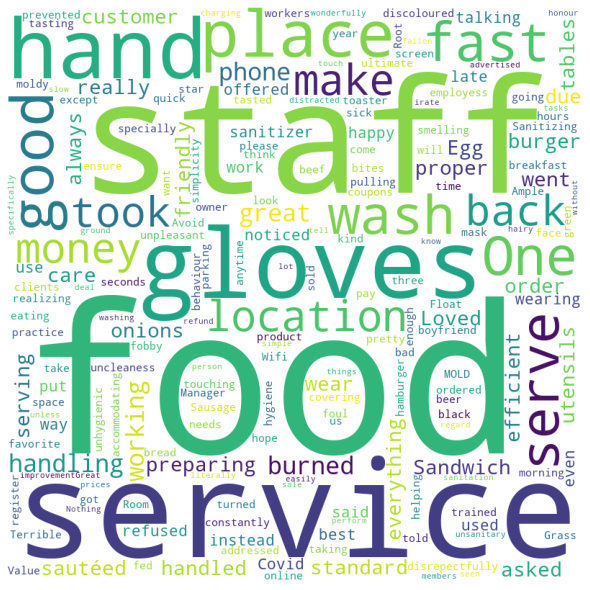

In [155]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

stopwords = set(STOPWORDS)
wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                stopwords = stopwords,
                min_font_size = 10).generate(text_speppard)
 
# plot the WordCloud image                      
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
 
plt.show()

For another location

In [158]:
yonge = df[df['location'] == '496 Yonge Street']

In [ ]:
yonge

In [160]:
r = list(yonge['reviews'])

In [ ]:
text_yonge = ''
for i in r:
  text_yonge = text_yonge+i
text_yonge

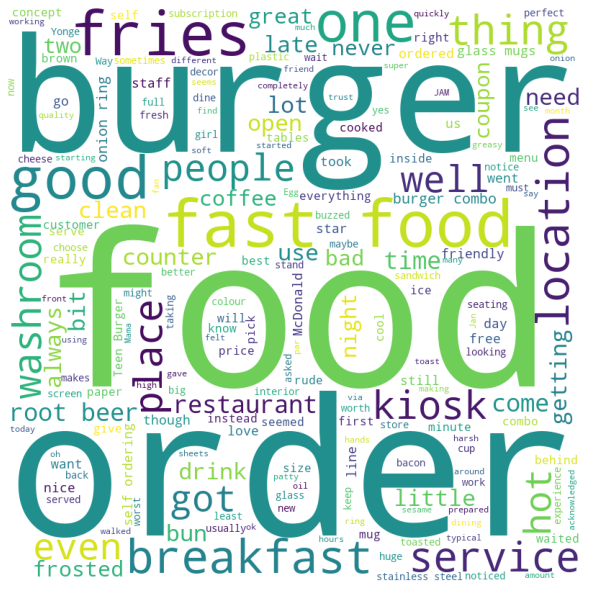

In [162]:
stopwords = set(STOPWORDS)
wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                stopwords = stopwords,
                min_font_size = 10).generate(text_yonge)
 
# plot the WordCloud image                      
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
 
plt.show()

Thanks for going through it!<br> Happy Coding❤